In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import spacy
import scispacy

import sqlite3
from sqlalchemy import create_engine 
from nltk.tokenize import word_tokenize, sent_tokenize



In [127]:
###con = sqlite3.connect("geo.db") 


In [128]:
###name_list = ['geo_0_10000', "geo_10000_10000", "geo_20000_10000", "geo_30000_10000", 
###             "geo_40000_10000", "geo_50000_10000", "geo_60000_10000", "geo_70000_10000", 
###             "geo_80000_10000", "geo_90000_10000", "geo_100000_10000"]
###def read_sql(name_list):
###    df = pd.DataFrame()
###    for i in name_list:
###        df_temp = pd.read_sql(f'SELECT * from {i}', con)
###        df_temp.sort_values(['Abstract'], inplace = True)
###        df_temp.drop_duplicates(subset=['Abstract'], inplace = True) 
###        df = pd.concat([df, df_temp])
###    return df
###df_total = read_sql(name_list)

In [2]:
# SQLAlchemy connectable

cnx = create_engine('sqlite:///geo.db').connect()
df = pd.read_sql_table('geo_0_200000', cnx)

In [3]:

df.sort_values(['Abstract'], inplace = True)
df.drop_duplicates(subset=['Abstract'], inplace = True)
mask = [i > 500 for i in [len(i) for i in df.Abstract]]
df = df[mask]
df.shape

(2828, 4)

In [134]:
##pattern = re.compile(r"COVID|covid")
##for n, i in enumerate(df2.Abstract.dropna()):
##    if len(pattern.findall(i)) > 1:
##        print(n)

In [114]:
##def keep_token(t):
##    return (t.is_alpha and 
##            not (t.is_space or t.is_punct or 
##                 t.is_stop or t.like_num))

In [3]:
##def clean_text(text):
##    clean_text1 = re.sub('/', ' ', text)
##    clean_text2 = re.sub('\w*\d\w*', ' ', clean_text1)
##    clean_text3 = re.sub('[)(]|\-$', ' ', clean_text2)
##    clean_text4 = re.sub('- $|^-|-$', '', clean_text3)
##    return clean_text4

In [7]:


#nlp = spacy.load("en_core_sci_sm")
#nlp = spacy.load("en_core_sci_md")
nlp = spacy.load("en_ner_bionlp13cg_md")



In [8]:
##news3 = news2.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
import CleanTextUtils as ctU
clean_abstract = df.Abstract.map(lambda x: ctU.clean_text(x))
tokenized_abstract = nlp.pipe(clean_abstract)

In [9]:
docs = []
for n, i in enumerate(tokenized_abstract):
    docs.append(ctU.clean_lemmatize_join_token(i))
    if n%100==0:
        print(n)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


In [5]:
df.Abstract.iloc[100]

'Adrenal glands are the major organs releasing catecholamines and regulating our stress response. The mechanisms balancing generation of adrenergic chromaffin cells and protecting against neuroblastoma tumors are still enigmatic. Here we revealed that serotonin (5HT) controls the numbers of chromaffin cells by acting upon their immediate progenitor "bridge" cells via 5-hydroxytryptamine receptor 3A (HTR3A), and the aggressive HTR3Ahigh human neuroblastoma cell lines reduce proliferation in response to HTR3A-specific agonists. In embryos (in vivo), the physiological increase of 5HT caused a prolongation of the cell cycle in "bridge" progenitors leading to a smaller chromaffin population and changing the balance of hormones and behavioral patterns in adulthood. These behavioral effects and smaller adrenals were mirrored in the progeny of pregnant female mice subjected to experimental stress, suggesting a maternal-fetal link that controls developmental adaptations. Finally, these results 

In [6]:
docs[100]

'adrenal gland organ catecholamine adrenergic chromaffin cell neuroblastoma tumor serotonin chromaffin cell progenitor cell human neuroblastoma cell line embryo cell progenitor chromaffin adrenal mouse adrenal'

In [12]:
##with open('doc_ents.pkl', 'wb') as f:
##    pickle.dump(doc_ents, f)
with open('docs.pkl', 'wb') as f:
    pickle.dump(docs, f)

In [4]:
with open('docs.pkl', 'rb') as f:
    docs = pickle.load(f)

## Unsupervised clustering strategy I: kMeans clustering

In [5]:
import doNLPUtils as dNU
import plotUtils as plU
import plotdistUtils as pdU

cv, doc_word = dNU.vectorizeTextIDF(docs)


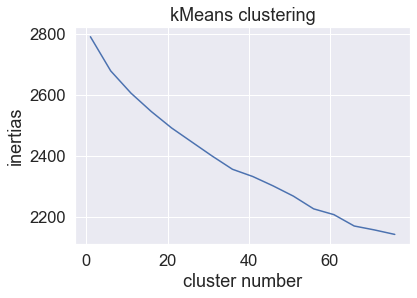

In [13]:
from sklearn.cluster import KMeans
inertias = []
for k in np.arange(1, 80, 5):
    km = KMeans(n_clusters=k)
    km.fit(doc_word.toarray())
    inertias.append(km.inertia_)

plt.plot(np.arange(1, 80, 5), inertias)
plt.xlabel('cluster number')
plt.ylabel("inertias")
plt.title('kMeans clustering')
plt.savefig('Image/inertias_1.jpg',  bbox_inches='tight')

In [22]:

doc_clusters, ordered_cluster, top_word_kMeans = dNU.dokMeans(15, doc_word, cv, 2) 



Topic  1
crc, colorectal

Topic  2
kidney, renal

Topic  3
stem, epithelial

Topic  4
chromatin, aml

Topic  5
liver, pdac

Topic  6
breast, tnbc

Topic  7
macrophage, monocyte

Topic  8
gbm, glioblastoma

Topic  9
hcc, hepatocellular

Topic  10
mitochondrial, mitochondria

Topic  11
lung, covid

Topic  12
ec, endothelial

Topic  13
il, brain

Topic  14
melanoma, braf

Topic  15
mir, pten




/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


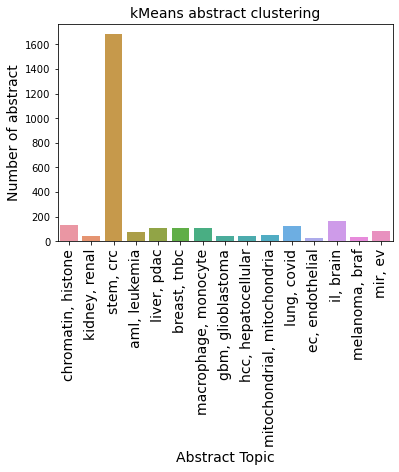

In [7]:

df_append_result_kMeans = plU.df_append_result_kMeans(df, doc_clusters)
plU.getCounts(df_append_result_kMeans, top_word_kMeans, name = 'kMeans')  

/Users/chioun/Desktop/metis_data_camp/Github_repo/NLP/plotdistUtils.py:19: RuntimeWarning: invalid value encountered in double_scalars
  dist = (np.dot(i, cluster_center)/np.linalg.norm(i)/np.linalg.norm(cluster_center), n)
/Users/chioun/Desktop/metis_data_camp/Github_repo/NLP/plotdistUtils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  dist2 = (np.dot(i, cluster_center)/np.linalg.norm(i)/np.linalg.norm(cluster_center))


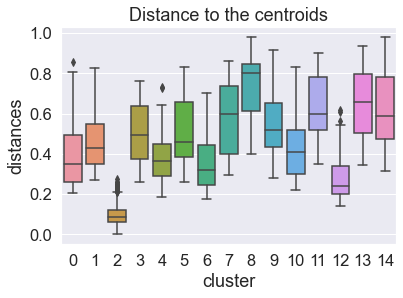

In [9]:

pdU.distance_plot(doc_word.toarray(), docs, doc_clusters, ordered_cluster, 'kMeans_1')

## Unsupervised clustering strategy II: NMF topic modeling followed by kMeans clustering

In [10]:

##doc_clusters, ordered_cluster, top_word_kMeans = dNU.dokMeans(15, doc_word, cv, 2)

doc_topic_matrix, topic_word_matrix, top_word_each_topic = dNU.doNMF(15, doc_word, cv, 2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic  1
lung, epithelial

Topic  2
mir, exosome

Topic  3
breast, er

Topic  4
chromatin, histone

Topic  5
hcc, hepatocellular

Topic  6
stem, pluripotent

Topic  7
aml, leukemia

Topic  8
macrophage, monocyte

Topic  9
covid, coronavirus

Topic  10
crc, colorectal

Topic  11
liver, hepatic

Topic  12
gbm, brain

Topic  13
il, skin

Topic  14
melanoma, braf

Topic  15
mitochondrial, muscle




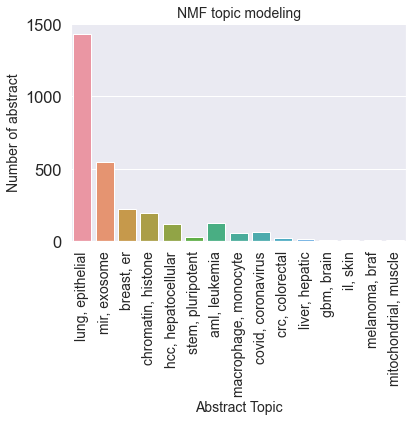

In [11]:
df_append_result_NMF = plU.df_append_result(df, doc_topic_matrix, name='NMF')
#df_append_result_NMF2 = df_append_result_NMF[df_append_result_NMF['NMF_score'] >= 0.01]
plU.getCounts(df_append_result_NMF, top_word_each_topic, 'NMF')  

/Users/chioun/Desktop/metis_data_camp/Github_repo/NLP/plotdistUtils.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dist = (np.dot(i, j)/np.linalg.norm(i)/np.linalg.norm(j), (i, j))
/Users/chioun/Desktop/metis_data_camp/Github_repo/NLP/plotdistUtils.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dist2 = (np.dot(i, j)/np.linalg.norm(i)/np.linalg.norm(j))


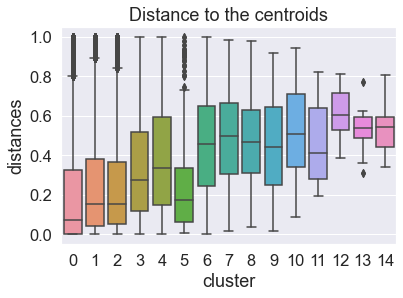

In [14]:

pdU.distance_plot2(doc_topic_matrix, docs, 'NMF')

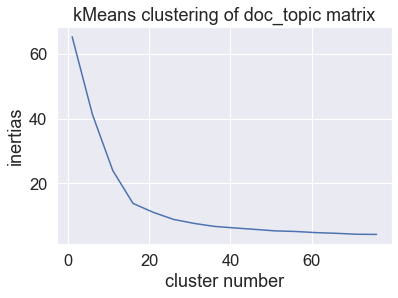

In [12]:
from sklearn.cluster import KMeans
inertias = []
for k in np.arange(1, 80, 5):
    km = KMeans(n_clusters=k)
    km.fit(doc_topic_matrix)
    inertias.append(km.inertia_)

plt.plot(np.arange(1, 80, 5), inertias)
plt.xlabel('cluster number')
plt.ylabel("inertias")
plt.title('kMeans clustering of doc_topic matrix')
plt.savefig('Image/inertias_2.jpg',  bbox_inches='tight')

In [18]:
doc_clusters_2, ordered_cluster_2, top_word_kMeans_2 = dNU.dokMeans2(15, doc_topic_matrix, top_word_each_topic, 2)


Topic  1
stem, pluripotent, gbm, brain

Topic  2
breast, er, chromatin, histone

Topic  3
macrophage, monocyte, il, skin

Topic  4
chromatin, histone, stem, pluripotent

Topic  5
aml, leukemia, chromatin, histone

Topic  6
mir, exosome, macrophage, monocyte

Topic  7
hcc, hepatocellular, liver, hepatic

Topic  8
crc, colorectal, stem, pluripotent

Topic  9
melanoma, braf, chromatin, histone

Topic  10
mitochondrial, muscle, stem, pluripotent

Topic  11
gbm, brain, stem, pluripotent

Topic  12
liver, hepatic, stem, pluripotent

Topic  13
covid, coronavirus, lung, epithelial

Topic  14
il, skin, macrophage, monocyte

Topic  15
stem, pluripotent, chromatin, histone




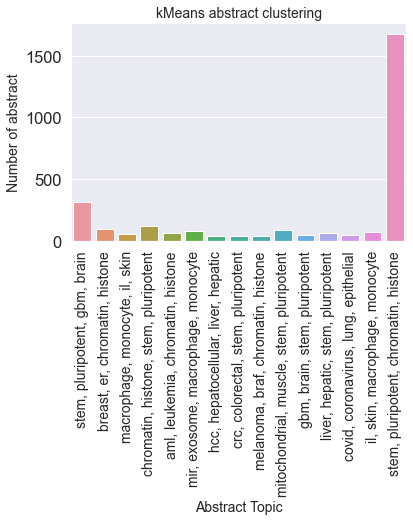

In [20]:
#df_append_result = df_append_result_kMeans(df, doc_clusters)
#doc_clusters, ordered_cluster, top_word_kMeans = dokMeans(9, doc_word, cv, 5)
#doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(9, doc_word, cv, 8)


df_append_result_kMeans_2 = plU.df_append_result_kMeans(df, doc_clusters_2)
plU.getCounts_2(df_append_result_kMeans_2, top_word_kMeans_2, name = 'kMeans')  

/Users/chioun/Desktop/metis_data_camp/Github_repo/NLP/plotdistUtils.py:19: RuntimeWarning: invalid value encountered in double_scalars
  dist = (np.dot(i, cluster_center)/np.linalg.norm(i)/np.linalg.norm(cluster_center), n)
/Users/chioun/Desktop/metis_data_camp/Github_repo/NLP/plotdistUtils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  dist2 = (np.dot(i, cluster_center)/np.linalg.norm(i)/np.linalg.norm(cluster_center))


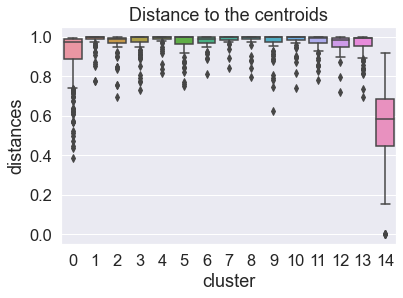

In [21]:
pdU.distance_plot(doc_topic_matrix, docs, doc_clusters_2, ordered_cluster_2, 'kMeans_2')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2828 samples in 0.000s...
[t-SNE] Computed neighbors for 2828 samples in 0.217s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2828
[t-SNE] Computed conditional probabilities for sample 2000 / 2828
[t-SNE] Computed conditional probabilities for sample 2828 / 2828
[t-SNE] Mean sigma: 0.474041
[t-SNE] Computed conditional probabilities in 0.066s
[t-SNE] Iteration 50: error = 121.4051056, gradient norm = 0.0522655 (50 iterations in 0.483s)
[t-SNE] Iteration 100: error = 119.7046967, gradient norm = 0.0570213 (50 iterations in 0.507s)
[t-SNE] Iteration 150: error = 123.4730606, gradient norm = 0.0295842 (50 iterations in 0.603s)
[t-SNE] Iteration 200: error = 120.6472626, gradient norm = 0.1428306 (50 iterations in 0.618s)
[t-SNE] Iteration 250: error = 125.8609924, gradient norm = 0.0417746 (50 iterations in 0.598s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 125.860992
[t-SNE] Iteration 300

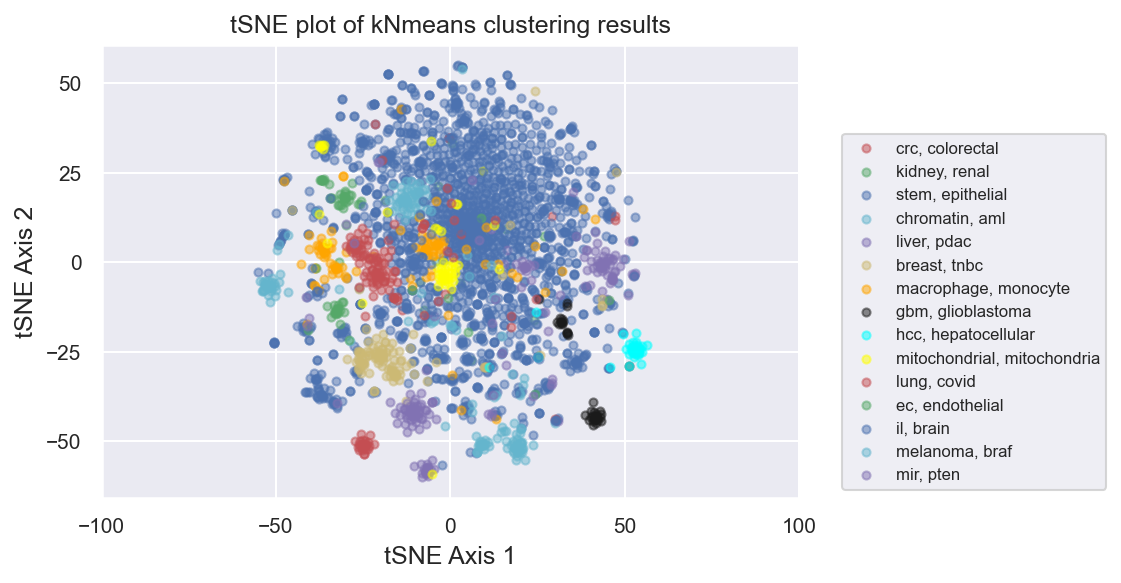

In [23]:
from sklearn.manifold import TSNE
from itertools import cycle
#df_append_result = df_append_result_kMeans(df, doc_clusters)
#doc_clusters, ordered_cluster, doc_clusters = dokMeans(9, doc_word, cv, 5)
#doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(9, doc_word, cv, 8)




model = TSNE(n_components=2, random_state=0,verbose=2)
low_data = model.fit_transform(doc_word)

target = doc_clusters
target_names = np.array(top_word_kMeans)

colors = cycle(['r','g','b','c','m','y','orange','k','aqua','yellow'])
target_ids = range(len(target_names))
plt.figure(dpi=150)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(low_data[target == i, 0], low_data[target == i, 1], c=c, label=label, s=15, alpha=0.5)
plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
plt.title("tSNE plot of kNmeans clustering results", fontsize=12)
plt.ylabel("tSNE Axis 2", fontsize=12)
plt.xlabel("tSNE Axis 1", fontsize=12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', fontsize = 8)
plt.savefig('Image/tSNE_kMeans.jpg',  bbox_inches='tight') ;

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2828 samples in 0.002s...
[t-SNE] Computed neighbors for 2828 samples in 0.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2828
[t-SNE] Computed conditional probabilities for sample 2000 / 2828
[t-SNE] Computed conditional probabilities for sample 2828 / 2828
[t-SNE] Mean sigma: 0.008683
[t-SNE] Computed conditional probabilities in 0.083s
[t-SNE] Iteration 50: error = 76.7484131, gradient norm = 0.0607887 (50 iterations in 0.434s)
[t-SNE] Iteration 100: error = 70.1741486, gradient norm = 0.0070378 (50 iterations in 0.340s)
[t-SNE] Iteration 150: error = 69.4185104, gradient norm = 0.0072631 (50 iterations in 0.342s)
[t-SNE] Iteration 200: error = 69.1815948, gradient norm = 0.0054419 (50 iterations in 0.320s)
[t-SNE] Iteration 250: error = 69.1324005, gradient norm = 0.0027970 (50 iterations in 0.337s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.132401
[t-SNE] Iteration 300: erro

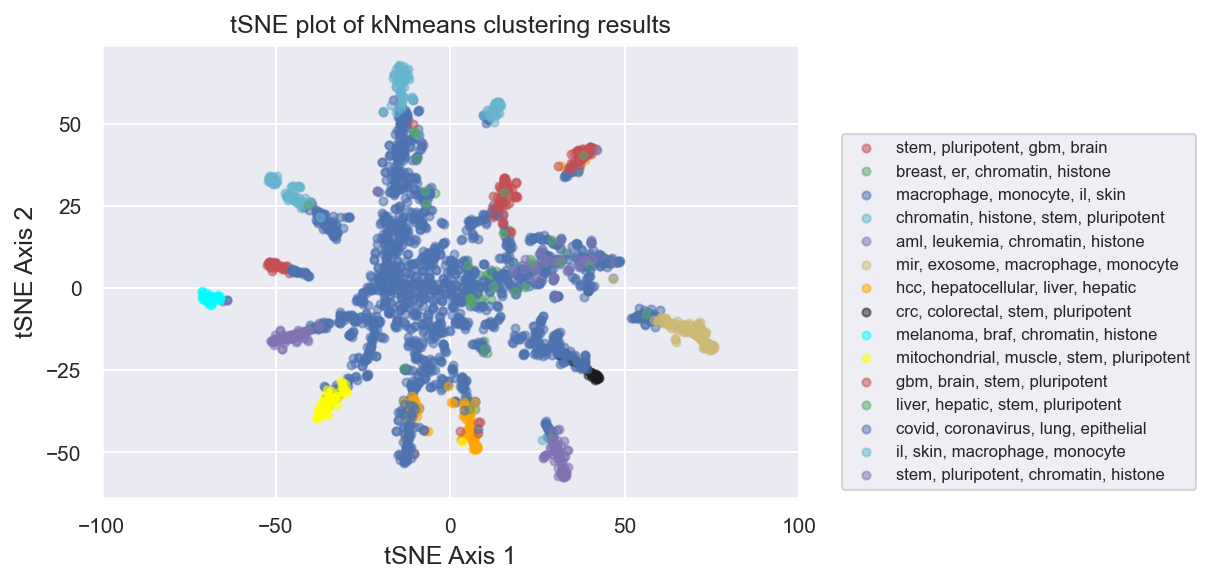

In [25]:
from sklearn.manifold import TSNE
from itertools import cycle
#df_append_result = df_append_result_kMeans(df, doc_clusters)
#doc_clusters, ordered_cluster, doc_clusters = dokMeans(9, doc_word, cv, 5)
#doc_topic_matrix, topic_word_matrix, top_word_each_topic = doNMF(9, doc_word, cv, 8)




model = TSNE(n_components=2, random_state=0,verbose=2)
low_data = model.fit_transform(doc_topic_matrix)

target = doc_clusters
target_names = np.array(top_word_kMeans_2)

colors = cycle(['r','g','b','c','m','y','orange','k','aqua','yellow'])
target_ids = range(len(target_names))
plt.figure(dpi=150)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(low_data[target == i, 0], low_data[target == i, 1], c=c, label=label, s=15, alpha=0.5)
plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
plt.title("tSNE plot of kNmeans clustering results", fontsize=12)
plt.ylabel("tSNE Axis 2", fontsize=12)
plt.xlabel("tSNE Axis 1", fontsize=12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', fontsize = 8)
plt.savefig('Image/tSNE_kMeans2.jpg',  bbox_inches='tight') ;